# Exploració del Decision Tree + mètodes d'Ensemble
###### Juan Carlos Soriano Valle 1493037

La ruta dels datasets a carregar és dintre una carpeta al directori arrel anomanat "Data". Ruta completa -> ./Data/fashion-mnist_train_small ... .csv

### Importem tot el necesari per treballar amb sklearn i plots

In [1]:
# funcions i paquets per a visualitzacio
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# paquet per a manipulacio de dades
import pandas as pd

import numpy as np

# funcions i paquets per a carregar datasets especifics (exemples simples)
from sklearn import datasets

# funcions per a partició de dades
from sklearn.model_selection import train_test_split
# funcions per a classificacio kNN
from sklearn.tree import DecisionTreeClassifier
# funcions per a classificacio kNN
from sklearn.neighbors import KNeighborsClassifier
# funcions per a metriques de rendiment
from sklearn.metrics import accuracy_score,  precision_score, roc_curve,roc_auc_score, auc, recall_score
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,precision_recall_curve
from sklearn import preprocessing

#funcions per a la validació creuada
from sklearn.model_selection import cross_val_score

from sklearn import metrics

### Carreguem la base de dades, començarem amb el dataset binari

In [2]:
# Visualitzarem només 3 decimals per mostra, i definim el num de files i columnes a mostrar
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 50)

# Funcio per a llegir dades en format csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

# Carreguem dataset d'exemple
dataset = load_dataset('./Data/fashion-mnist_train_small_binary.csv')
y = dataset["label"].to_numpy()
X = dataset.drop("label", axis="columns").to_numpy()


print(f'tamany de les dades: {X.shape}')
print(f'Caracteristiques: \n {y}')
print("Dimensionalitat de la BBDD:", dataset.shape)

tamany de les dades: (600, 784)
Caracteristiques: 
 [1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1
 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 0 1

In [3]:
x_train,x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
KNNmodel = KNeighborsClassifier(n_neighbors=5)
KNNmodel.fit(x_train,y_train)

KNeighborsClassifier()

### Comprovem l'accuracy amb el classificador KNN

Accuracy:0.95
Precision:0.9874213836477987
Recall:0.9573170731707317


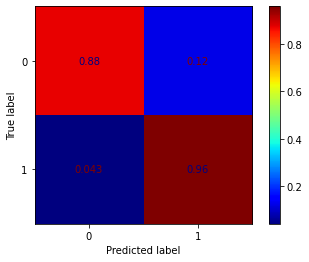

In [5]:
KNNpredictions = KNNmodel.predict(x_test)
KNNacc = accuracy_score(y_test, KNNpredictions)
KNNprec = precision_score(y_test, KNNpredictions)
KNNrec = recall_score(y_test, KNNpredictions)
KNNconf_mat = confusion_matrix(y_test, KNNpredictions).T

print(f'Accuracy:{KNNacc}')
print(f'Precision:{KNNprec}')
print(f'Recall:{KNNrec}')
plot_confusion_matrix(KNNmodel, x_test, y_test, normalize='true', cmap='jet')


El classificador KNN amb el dataset binari ens dona un 95% d'accuracy

### Comprovem l'accuracy amb el classificador d'arbre de decisió

La taxa d'error és de: 16.84451219512195%
L'accuracy' és de: 95.0%


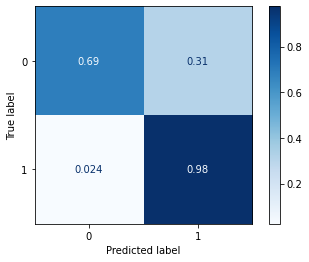

In [6]:
dec_tree = DecisionTreeClassifier(criterion='entropy', random_state=0)
dec_tree.fit(x_train, y_train)
y_pred = dec_tree.predict(x_test)

error = plot_confusion_matrix(dec_tree, x_test, y_test, normalize='true', cmap=plt.cm.Blues)
error = 1-(sum(np.diag(error.confusion_matrix)) / sum(error.confusion_matrix.ravel()))

acc = metrics.accuracy_score(y_test, y_pred)


print(f"La taxa d'error és de: {error*100}%")

print(f"L'accuracy' és de: {acc*100}%")

L'accuracy del classificador KNN i del decision tree són els mateixos (95%), el que ens fa pensar que tant un com l'altre en un mètode simple ens donarien resultats molt similars.

### Aplicant l'Adaboost

L'accuracy amb 1 és de: 93.88888888888889%
L'accuracy amb 51 és de: 95.0%
L'accuracy amb 101 és de: 95.55555555555556%
L'accuracy amb 151 és de: 95.55555555555556%
L'accuracy amb 201 és de: 96.11111111111111%
L'accuracy amb 251 és de: 95.0%
L'accuracy amb 301 és de: 95.55555555555556%
L'accuracy amb 351 és de: 95.55555555555556%
L'accuracy amb 401 és de: 95.0%
L'accuracy amb 451 és de: 95.0%


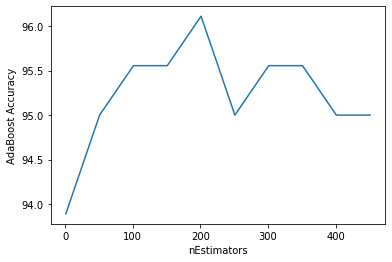

In [7]:
from sklearn.ensemble import AdaBoostClassifier

est_range = range(1,501,50)
est_errors = []

for estimators in est_range:
    ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators = estimators);
    ada_boost.fit(x_train, y_train)
    y_pred = ada_boost.predict(x_test)
    
    
    #error = plot_confusion_matrix(ada_boost, x_test, y_test, normalize='true', cmap=plt.cm.Blues)
    #error = 1-(sum(np.diag(error.confusion_matrix)) / sum(error.confusion_matrix.ravel()))
    error = metrics.accuracy_score(y_test, y_pred)
    
    est_errors.append(error*100)
    print(f"L'accuracy amb {estimators} és de: {error*100}%")

plt.plot(est_range, est_errors)
plt.xlabel("nEstimators")
plt.ylabel("AdaBoost Accuracy")

plt.show();



Aplicant l'AdaBoost amb diferents estimadors veiem com per 200 estimadors el nostre model millora fins el 96% d'accuracy, millor que els dos models anteriors simples

### Aplicant Random Forest

L'accuracy amb 1 és de: 93.88888888888889%
L'accuracy amb 51 és de: 96.66666666666667%
L'accuracy amb 101 és de: 96.66666666666667%
L'accuracy amb 151 és de: 96.11111111111111%
L'accuracy amb 201 és de: 96.11111111111111%
L'accuracy amb 251 és de: 96.11111111111111%
L'accuracy amb 301 és de: 96.11111111111111%
L'accuracy amb 351 és de: 96.11111111111111%
L'accuracy amb 401 és de: 96.11111111111111%
L'accuracy amb 451 és de: 96.11111111111111%


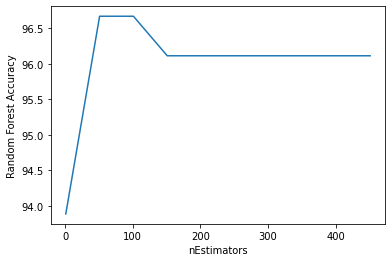

In [8]:
from sklearn.ensemble import RandomForestClassifier

est_range = range(1,501,50)
est_errors = []

for estimators in est_range:
    random_forest = RandomForestClassifier(n_estimators=estimators, max_features=0.1, random_state=42)
    random_forest.fit(x_train, y_train)
    y_pred = random_forest.predict(x_test)
    
    error = metrics.accuracy_score(y_test, y_pred)
    
    est_errors.append(error*100)
    print(f"L'accuracy amb {estimators} és de: {error*100}%")
    
    
plt.plot(est_range, est_errors)
plt.xlabel("nEstimators")
plt.ylabel("Random Forest Accuracy")

plt.show();

Al observar els resultats del Random Forest podem veure com aquest arriba a un màxim d'accuracy del 96,67%, millorant aixì els dos mètodes simples i l'AdaBoost.

### Importància de les característiques

Observem el pes de les característiques en els dos mètodes aplicats

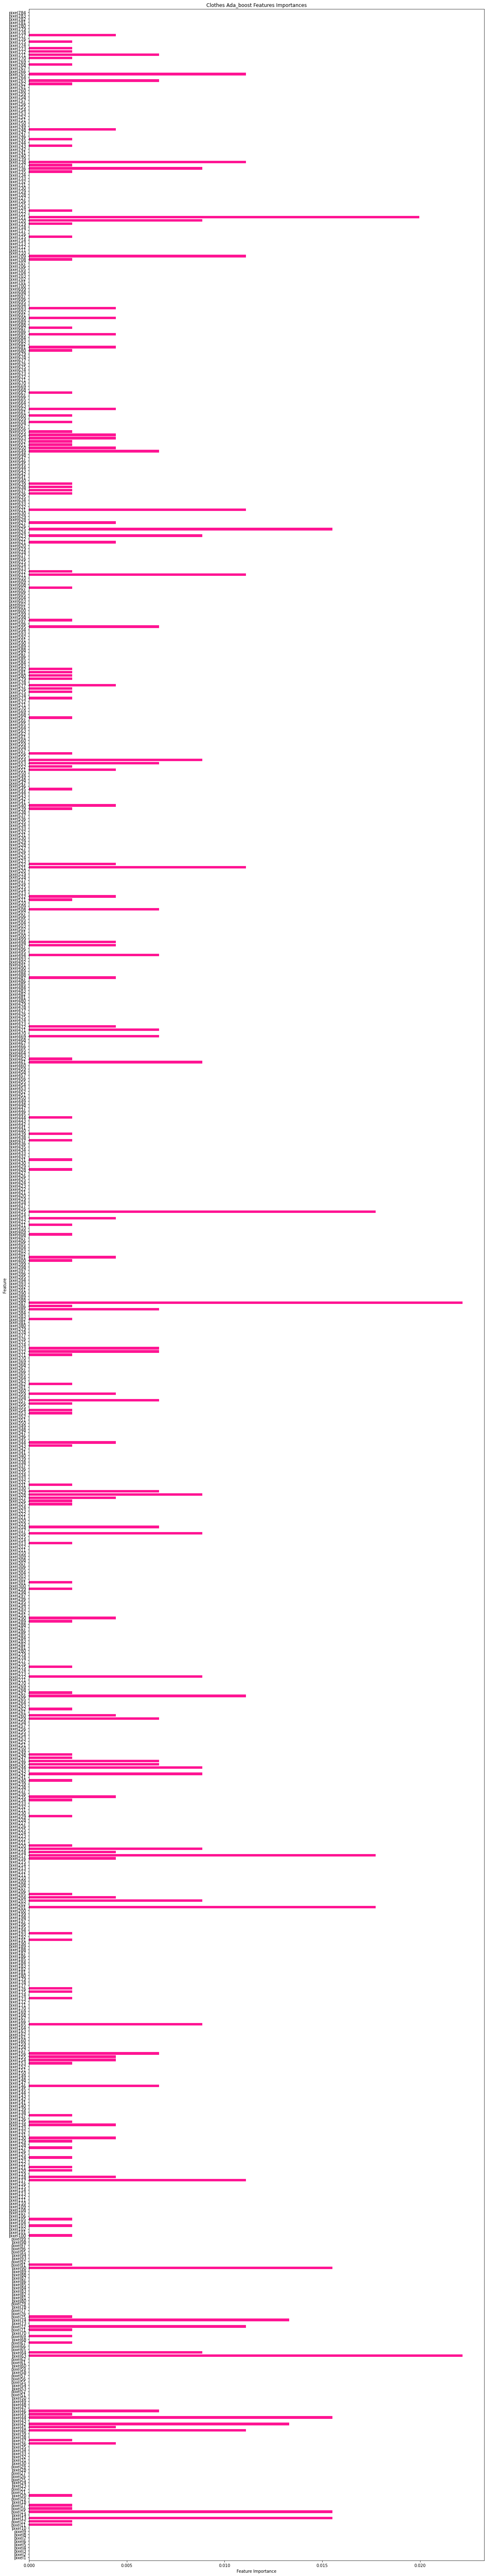

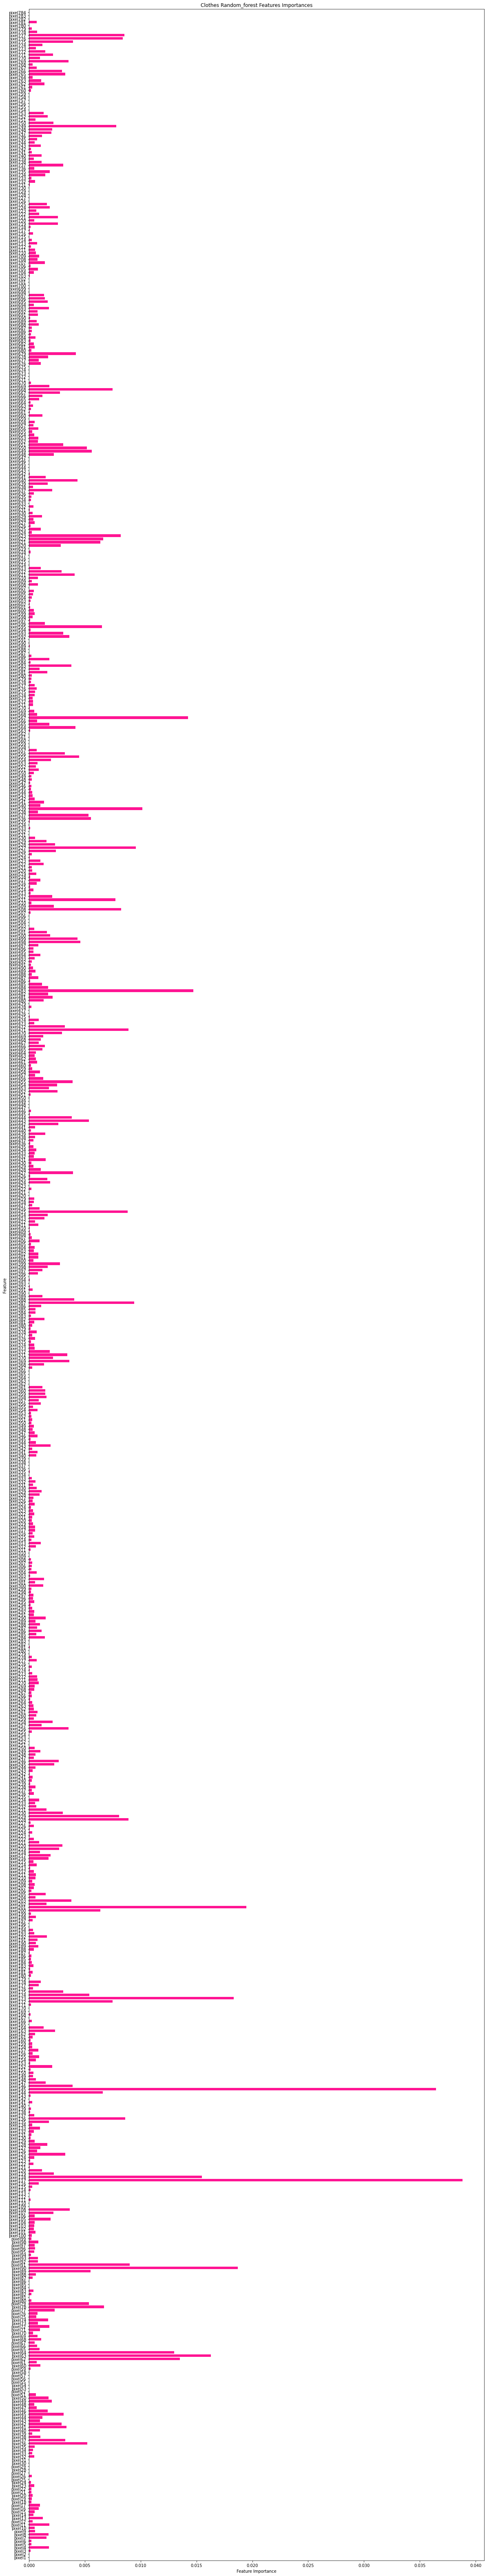

In [9]:
def clothes_feature_importance_plot(model, nom_model):
    plt.figure(figsize=(20,115))
    n_features = len(dataset.columns.values)-1
    plt.barh(range(n_features), model.feature_importances_, align='center', color=['#FF1493'])
    plt.yticks(np.arange(n_features), dataset.columns.values[1:])
    plt.title('Clothes ' + str(nom_model)+ ' Features Importances')
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    
clothes_feature_importance_plot(ada_boost, "Ada_boost")
plt.show()

clothes_feature_importance_plot(random_forest, "Random_forest")
plt.show()

### Ara carregarem el dataset multiclasse

In [10]:
# Visualitzarem només 3 decimals per mostra, i definim el num de files i columnes a mostrar
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 50)

# Funcio per a llegir dades en format csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

# Carreguem dataset d'exemple
dataset = load_dataset('./Data/fashion-mnist_train_small.csv')
y = dataset["label"].to_numpy()
X = dataset.drop("label", axis="columns").to_numpy()


print(f'tamany de les dades: {X.shape}')
print(f'Caracteristiques: \n {dataset.columns.values}')
print("Dimensionalitat de la BBDD:", dataset.shape)

tamany de les dades: (600, 784)
Caracteristiques: 
 ['label' 'pixel1' 'pixel2' 'pixel3' 'pixel4' 'pixel5' 'pixel6' 'pixel7'
 'pixel8' 'pixel9' 'pixel10' 'pixel11' 'pixel12' 'pixel13' 'pixel14'
 'pixel15' 'pixel16' 'pixel17' 'pixel18' 'pixel19' 'pixel20' 'pixel21'
 'pixel22' 'pixel23' 'pixel24' 'pixel25' 'pixel26' 'pixel27' 'pixel28'
 'pixel29' 'pixel30' 'pixel31' 'pixel32' 'pixel33' 'pixel34' 'pixel35'
 'pixel36' 'pixel37' 'pixel38' 'pixel39' 'pixel40' 'pixel41' 'pixel42'
 'pixel43' 'pixel44' 'pixel45' 'pixel46' 'pixel47' 'pixel48' 'pixel49'
 'pixel50' 'pixel51' 'pixel52' 'pixel53' 'pixel54' 'pixel55' 'pixel56'
 'pixel57' 'pixel58' 'pixel59' 'pixel60' 'pixel61' 'pixel62' 'pixel63'
 'pixel64' 'pixel65' 'pixel66' 'pixel67' 'pixel68' 'pixel69' 'pixel70'
 'pixel71' 'pixel72' 'pixel73' 'pixel74' 'pixel75' 'pixel76' 'pixel77'
 'pixel78' 'pixel79' 'pixel80' 'pixel81' 'pixel82' 'pixel83' 'pixel84'
 'pixel85' 'pixel86' 'pixel87' 'pixel88' 'pixel89' 'pixel90' 'pixel91'
 'pixel92' 'pixel93' 'pixe

In [11]:
x_train,x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Veiem quin resultat ens dona el classificador KNN

In [12]:
KNNmodel = KNeighborsClassifier(n_neighbors=5)
KNNmodel.fit(x_train,y_train)

KNeighborsClassifier()

Accuracy:0.6666666666666666
Precision:0.6764580314884574
Recall:0.6770159208982739


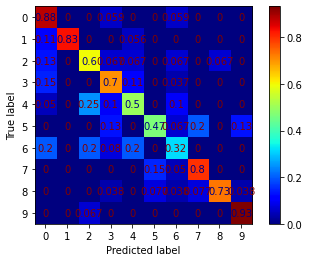

In [13]:
KNNpredictions = KNNmodel.predict(x_test)
KNNacc = accuracy_score(y_test, KNNpredictions)
KNNprec = precision_score(y_test, KNNpredictions, average='macro')
KNNrec = recall_score(y_test, KNNpredictions, average='macro')
KNNconf_mat = confusion_matrix(y_test, KNNpredictions).T

print(f'Accuracy:{KNNacc}')
print(f'Precision:{KNNprec}')
print(f'Recall:{KNNrec}')
plot_confusion_matrix(KNNmodel, x_test, y_test, normalize='true', cmap='jet')

Ens retorna un 66,67% d'accuracy

### Comprovem l'accuracy amb el classificador d'arbre de decisió

La taxa d'error és de: 37.183542818836926%
L'accuracy' és de: 61.111111111111114%


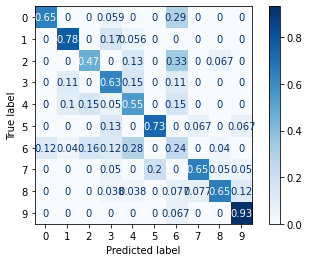

In [14]:
dec_tree = DecisionTreeClassifier(criterion='entropy', random_state=0)
dec_tree.fit(x_train, y_train)
y_pred = dec_tree.predict(x_test)

error = plot_confusion_matrix(dec_tree, x_test, y_test, normalize='true', cmap=plt.cm.Blues)
error = 1-(sum(np.diag(error.confusion_matrix)) / sum(error.confusion_matrix.ravel()))

acc = metrics.accuracy_score(y_test, y_pred)


print(f"La taxa d'error és de: {error*100}%")

print(f"L'accuracy' és de: {acc*100}%")

L'accuracy de l'arbre de decisió en aquest cas és més baix que en el cas anterior on el dataset era binari. Anem a veure si amb els mètodes d'ensemble podem millorar el resultat.

### Aplicant l'AdaBoost

L'accuracy amb 1 és de: 23.232323232323232%
L'accuracy amb 51 és de: 20.2020202020202%
L'accuracy amb 101 és de: 20.2020202020202%
L'accuracy amb 151 és de: 20.2020202020202%
L'accuracy amb 201 és de: 20.2020202020202%
L'accuracy amb 251 és de: 20.2020202020202%
L'accuracy amb 301 és de: 20.2020202020202%
L'accuracy amb 351 és de: 20.2020202020202%
L'accuracy amb 401 és de: 20.2020202020202%
L'accuracy amb 451 és de: 20.2020202020202%


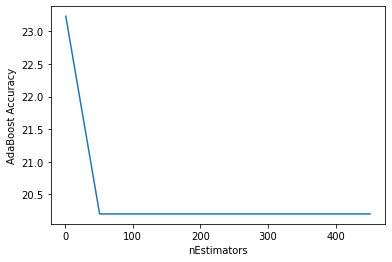

In [15]:
from sklearn.ensemble import AdaBoostClassifier

est_range = range(1,501,50)
est_errors = []

for estimators in est_range:
    ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators = estimators);
    ada_boost.fit(x_train, y_train)
    y_pred = ada_boost.predict(x_test)
    
    
    #error = plot_confusion_matrix(ada_boost, x_test, y_test, normalize='true', cmap=plt.cm.Blues)
    #error = 1-(sum(np.diag(error.confusion_matrix)) / sum(error.confusion_matrix.ravel()))
    error = metrics.accuracy_score(y_test, y_pred)
    
    est_errors.append(error*100)
    print(f"L'accuracy amb {estimators} és de: {error*100}%")

plt.plot(est_range, est_errors)
plt.xlabel("nEstimators")
plt.ylabel("AdaBoost Accuracy")

plt.show();

Veiem com l'AdaBoost ens retorna un valor molt baix, sent el més baix de tots els resultats de l'exercici. Podem deduir que aquest mètode no funciona molt bé amb aquestes característiques de dataset

### Aplicant Random Forest

L'accuracy amb 1 és de: 68.18181818181817%
L'accuracy amb 51 és de: 79.29292929292929%
L'accuracy amb 101 és de: 79.29292929292929%
L'accuracy amb 151 és de: 79.29292929292929%
L'accuracy amb 201 és de: 79.29292929292929%
L'accuracy amb 251 és de: 79.29292929292929%
L'accuracy amb 301 és de: 79.29292929292929%
L'accuracy amb 351 és de: 79.7979797979798%
L'accuracy amb 401 és de: 79.29292929292929%
L'accuracy amb 451 és de: 78.78787878787878%


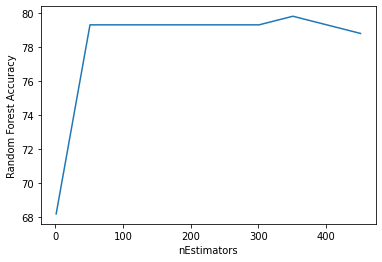

In [16]:
from sklearn.ensemble import RandomForestClassifier

est_range = range(1,501,50)
est_errors = []

for estimators in est_range:
    random_forest = RandomForestClassifier(n_estimators=estimators, max_features=0.1, random_state=42)
    random_forest.fit(x_train, y_train)
    y_pred = random_forest.predict(x_test)
    
    error = metrics.accuracy_score(y_test, y_pred)
    
    est_errors.append(error*100)
    print(f"L'accuracy amb {estimators} és de: {error*100}%")
    
    
plt.plot(est_range, est_errors)
plt.xlabel("nEstimators")
plt.ylabel("Random Forest Accuracy")

plt.show();

Per fi veiem una millora significativa en els resultats del dataset no binari. Aquest mètode d'ensamble ens dóna un resultat molt positiu, millorant en gran mesura els resultats de l'arbre de decisió pur.

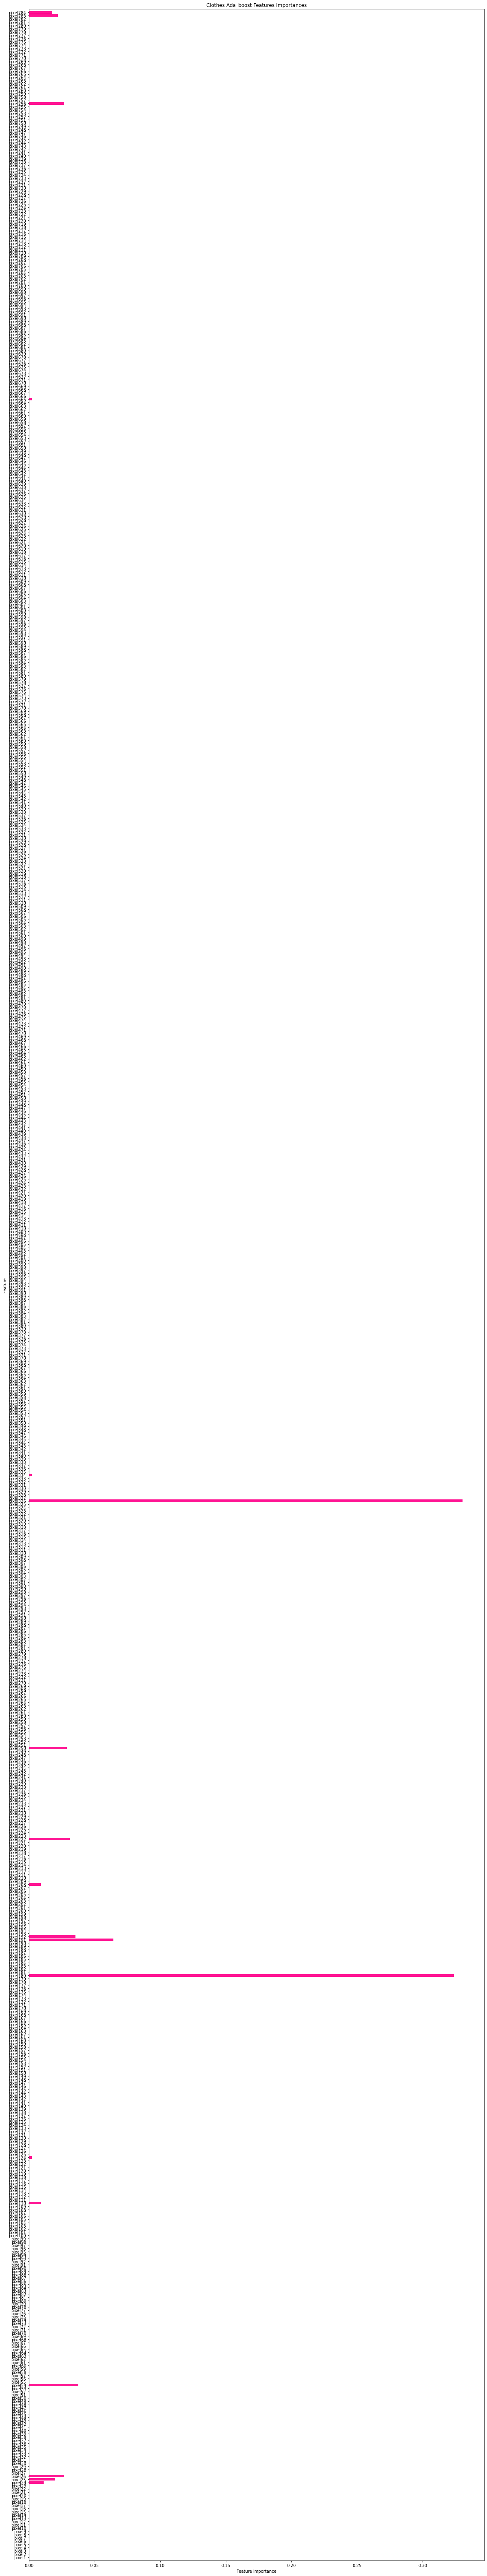

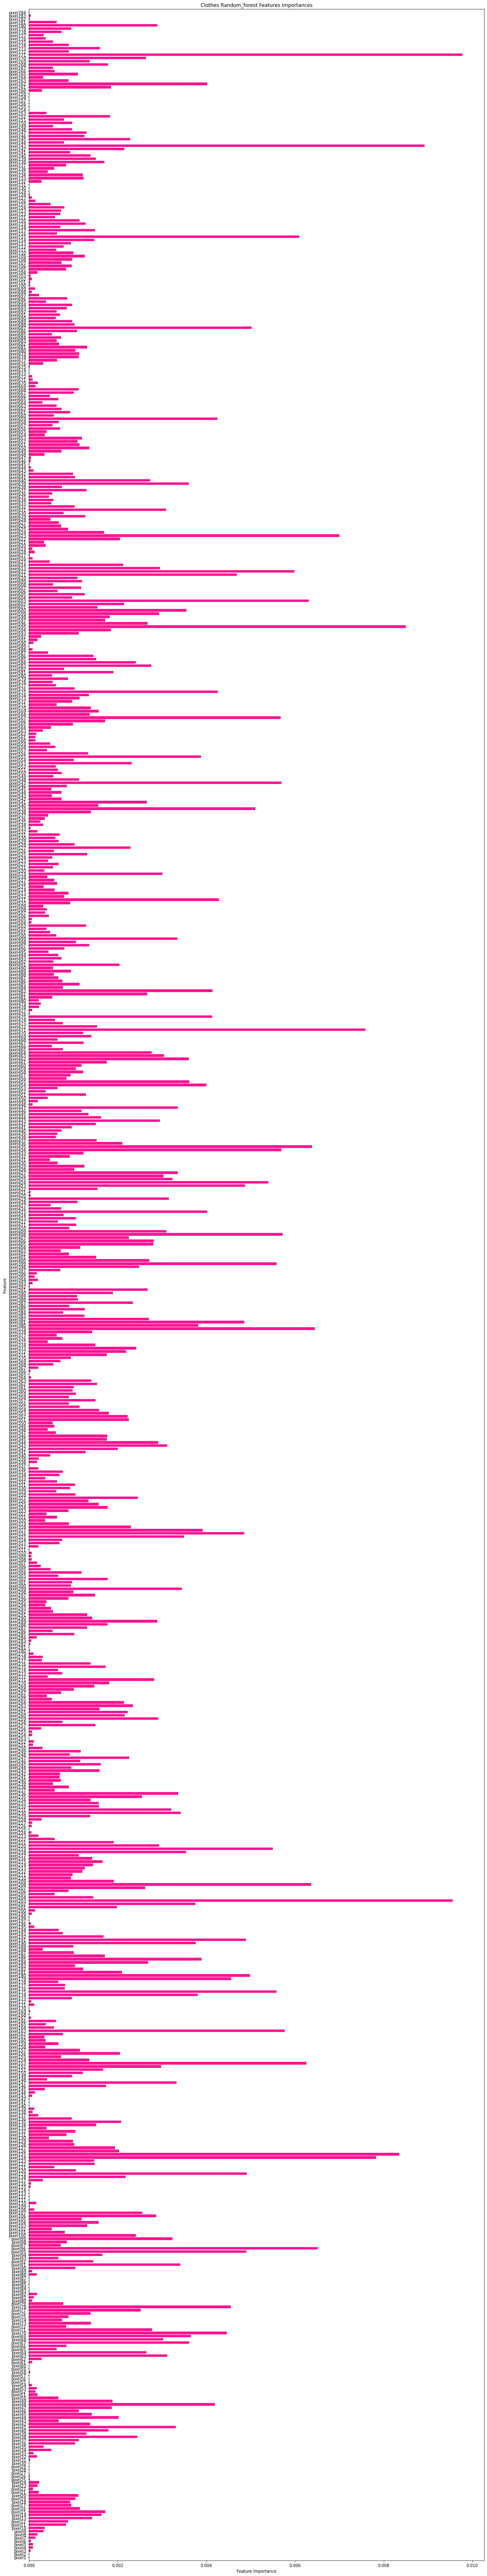

In [17]:
clothes_feature_importance_plot(ada_boost, "Ada_boost")
plt.show()

clothes_feature_importance_plot(random_forest, "Random_forest")
plt.show()

Veiem un canvi molt significatiu entre els pesos que se li atribueixen als elements en el cas de l'AdaBoost i el Random Forest. A l'AdaBoost són molt pocs valors sensibles però en gran valor, mentre que en el cas del RandomForest aquest valor de pes és molt més petit però amb més distribució entre els elements del dataset (en aquest cas els píxels de la foto)